In [137]:
import utils.common
import evaluation
import importlib
import numpy as np
import time
import models.MatrixFactorization
import models.BPR
import models.ConstraintAutoRec
import models.NeuralLogicRec
import pandas as pd
importlib.reload(utils.common)
importlib.reload(evaluation)
importlib.reload(models.MatrixFactorization)
importlib.reload(models.ConstraintAutoRec)
importlib.reload(models.BPR)
importlib.reload(models.NeuralLogicRec)

<module 'models.NeuralLogicRec' from '/home/ec2-user/SageMaker/rs-ml-with-constraints/models/NeuralLogicRec.py'>

In [8]:
eval_ml = evaluation.Evaluation(utils.common.movie_lens)

# Preparations
Pre train ConstraintAutoRec model for 5 epcohs without constraints for both MovieLens and MSD datasets

In [ ]:
pre_train_ml = models.ConstraintAutoRec.ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=10, novelty_weight=0.0, diversity_weight=0.0, name='ConstraintAutoRec_ML_pretrain')
pre_train_ml.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])
pre_train_ml.save('../saved_models')

In [46]:
eval_msd = evaluation.Evaluation(utils.common.msd)
pre_train_msd = models.ConstraintAutoRec.ConstraintAutoRec(utils.common.msd['dimensions'], epochs=5, novelty_weight=0.0, diversity_weight=0.0, name='ConstraintAutoRec_MSD_pretrain')
pre_train_msd.train(utils.common.load_dataset(utils.common.msd, 'train'), utils.common.msd['train']['records'])
pre_train_msd.save('../saved_models')

Epoch 1/5
3686/3686 [==============================] - 60s 16ms/step - loss: 0.1367 - accuracy: 0.0224
Epoch 2/5
3686/3686 [==============================] - 47s 13ms/step - loss: 0.1155 - accuracy: 0.0227
Epoch 3/5
3686/3686 [==============================] - 47s 13ms/step - loss: 0.1090 - accuracy: 0.0251
Epoch 4/5
3686/3686 [==============================] - 46s 13ms/step - loss: 0.1047 - accuracy: 0.0245
Epoch 5/5
3686/3686 [==============================] - 46s 13ms/step - loss: 0.1019 - accuracy: 0.0215


In [47]:
# pre_trained_values_ml = eval_ml.evaluate_single_thread(pre_train_ml)
pre_trained_values_msd = eval_msd.evaluate_single_thread(pre_train_msd)

In [48]:
pre_trained_values_msd

{'accuracy': 0.7797116434948488,
 'precision@5': 0.1073257138037198,
 'recall@5': 0.05511885060069977,
 'map@1': 0.1406941925688499,
 'map@5': 0.06884927998725393,
 'map@10': 0.05380031712097676,
 'diversity@5': 0.20857941921150433,
 'diversity@10': 0.22032034619479818,
 'epc@5': 0.946260835931058,
 'epc@10': 0.9491344340198895,
 'epd@5': 0.27438448588482334,
 'coverage@1': 0.3306019070321812,
 'coverage@5': 0.6129320619785459,
 'coverage@10': 0.7482121573301549,
 'name': 'ConstraintAutoRec_MSD_pretrain',
 'dimensions': 6712,
 'latent_dims': 32,
 'accuracy_weight': 1.0,
 'novelty_weight': 0.0,
 'diversity_weight': 0.0,
 'epochs': 5,
 'batch_size': 32,
 'optimizer': 'adam'}

# Diversity evaluation
## Training
Train all instances of ConstraintAutoRec with different values for diversity constraint weight

Values used: 0.5, 1.0, 2.0, 4.0, 8.0

In [20]:
evals = list()
diversity_weights = [0.5, 1.0, 2.0, 4.0, 8.0]
for div_weight in diversity_weights:
    diversity_model = models.ConstraintAutoRec.ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=5, novelty_weight=0.0, diversity_weight=div_weight, name='ConstraintAutoRec_ML_div_' + str(div_weight))
    diversity_model.load('../saved_models/ConstraintAutoRec_ML_pretrain.h5')
    diversity_model.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])
    diversity_model.save('../saved_models')
    evals.append(eval_ml.evaluate_single_thread(diversity_model))

Epoch 1/5
4327/4327 [==============================] - 88s 20ms/step - loss: 0.0862 - accuracy: 0.0108
Epoch 2/5
4327/4327 [==============================] - 73s 17ms/step - loss: 0.0858 - accuracy: 0.0111
Epoch 3/5
4327/4327 [==============================] - 73s 17ms/step - loss: 0.0855 - accuracy: 0.0109
Epoch 4/5
4327/4327 [==============================] - 74s 17ms/step - loss: 0.0852 - accuracy: 0.0110
Epoch 5/5
4327/4327 [==============================] - 74s 17ms/step - loss: 0.0847 - accuracy: 0.0114
Epoch 1/5214 predicted
4327/4327 [==============================] - 90s 21ms/step - loss: 0.0886 - accuracy: 0.0107
Epoch 2/5
4327/4327 [==============================] - 75s 17ms/step - loss: 0.0883 - accuracy: 0.0102
Epoch 3/5
4327/4327 [==============================] - 75s 17ms/step - loss: 0.0878 - accuracy: 0.0108
Epoch 4/5
4327/4327 [==============================] - 74s 17ms/step - loss: 0.0874 - accuracy: 0.0108
Epoch 5/5
4327/4327 [==============================] - 74s 1

In [50]:
div_evals_msd = list()
diversity_weights = [0.5, 1.0, 2.0, 4.0, 8.0]
for div_weight in diversity_weights:
    diversity_model = models.ConstraintAutoRec.ConstraintAutoRec(utils.common.msd['dimensions'], epochs=5, novelty_weight=0.0, diversity_weight=div_weight, name='ConstraintAutoRec_MSD_div_' + str(div_weight))
    diversity_model.load('../saved_models/ConstraintAutoRec_MSD_pretrain.h5')
    diversity_model.train(utils.common.load_dataset(utils.common.msd, 'train'), utils.common.msd['train']['records'])
    diversity_model.save('../saved_models')
    div_evals_msd.append(eval_msd.evaluate_single_thread(diversity_model))

Epoch 1/5
3686/3686 [==============================] - 60s 16ms/step - loss: 0.1020 - accuracy: 0.0219
Epoch 2/5
3686/3686 [==============================] - 48s 13ms/step - loss: 0.1006 - accuracy: 0.0209
Epoch 3/5
3686/3686 [==============================] - 48s 13ms/step - loss: 0.0991 - accuracy: 0.0226
Epoch 4/5
3686/3686 [==============================] - 47s 13ms/step - loss: 0.0979 - accuracy: 0.0210
Epoch 5/5
3686/3686 [==============================] - 47s 13ms/step - loss: 0.0970 - accuracy: 0.0201
Epoch 1/5186 predicted
3686/3686 [==============================] - 60s 16ms/step - loss: 0.1042 - accuracy: 0.0206
Epoch 2/5
3686/3686 [==============================] - 48s 13ms/step - loss: 0.1028 - accuracy: 0.0210
Epoch 3/5
3686/3686 [==============================] - 47s 13ms/step - loss: 0.1012 - accuracy: 0.0186
Epoch 4/5
3686/3686 [==============================] - 47s 13ms/step - loss: 0.1003 - accuracy: 0.0212
Epoch 5/5
3686/3686 [==============================] - 47s 1

In [59]:
results_diversity = pd.DataFrame([pre_trained_values_msd] + div_evals_msd)

## Result evaluation
The gained metrics for the diversity constraint are gained and summarized in the following

In [60]:
print(results_diversity[['diversity_weight',
       'map@1', 'map@5', 'map@10', ]].to_latex(float_format = "%.3f", index=False))
results_diversity[['diversity_weight',
       'diversity@5', 'diversity@10', 'epc@5', 'epd@5', 'coverage@5','coverage@1' ]]

\begin{tabular}{rrrr}
\toprule
 diversity\_weight &  map@1 &  map@5 &  map@10 \\
\midrule
            0.000 &  0.141 &  0.069 &   0.054 \\
            0.500 &  0.143 &  0.071 &   0.055 \\
            1.000 &  0.141 &  0.070 &   0.055 \\
            2.000 &  0.142 &  0.071 &   0.055 \\
            4.000 &  0.137 &  0.068 &   0.053 \\
            8.000 &  0.127 &  0.064 &   0.050 \\
\bottomrule
\end{tabular}



,diversity_weight,diversity@5,diversity@10,epc@5,epd@5,coverage@5,coverage@1
0,0.0,0.208579,0.220320,0.946261,0.274384,0.612932,0.330602
1,0.5,0.220484,0.230212,0.954539,0.278442,0.743743,0.426996
2,1.0,0.220470,0.232320,0.951101,0.279382,0.733760,0.425209
3,2.0,0.221469,0.231190,0.957750,0.280501,0.748212,0.436234
4,4.0,0.217772,0.228198,0.960000,0.278112,0.769964,0.460369
5,8.0,0.219965,0.231494,0.968597,0.280659,0.800954,0.482122


In [64]:
print(results_diversity[['diversity_weight',
       'diversity@5', 'diversity@10', 'epc@5', 'epd@5', 'coverage@5' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{rrrrrr}
\toprule
 diversity\_weight &  diversity@5 &  diversity@10 &  epc@5 &  epd@5 &  coverage@5 \\
\midrule
            0.000 &        0.209 &         0.220 &  0.946 &  0.274 &       0.613 \\
            0.500 &        0.220 &         0.230 &  0.955 &  0.278 &       0.744 \\
            1.000 &        0.220 &         0.232 &  0.951 &  0.279 &       0.734 \\
            2.000 &        0.221 &         0.231 &  0.958 &  0.281 &       0.748 \\
            4.000 &        0.218 &         0.228 &  0.960 &  0.278 &       0.770 \\
            8.000 &        0.220 &         0.231 &  0.969 &  0.281 &       0.801 \\
\bottomrule
\end{tabular}



# Visualization
Bar plots are used to visualize the change in metrics.

In [71]:
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors


def get_colors(idx):
    jet = cm = plt.get_cmap('viridis') 
    cNorm  = colors.Normalize(vmin=0, vmax=max(idx) + 1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    return scalarMap.to_rgba(idx)

def simple_plot(f, data, x, y):
    f.bar(data.index, data[y],color=get_colors(data.index))
    f.set_xticks(data.index)
    f.set_xticklabels(data[x])
    f.set_xlabel(y, fontsize=16)
    
def plot_bar(data, axis, x_param):
    bottom = data[axis].min() 
    top = data[axis].max()
    margin = (top - bottom) * 0.05
    fig, ax = plt.subplots()
    ax.bar(data.index, data[axis] )
    ax.set_xticks(data.index)
    ax.set_xticklabels(data[x_param])
    ax.set_ylabel(axis)
    ax.set_xlabel(x_param)
    plt.show()

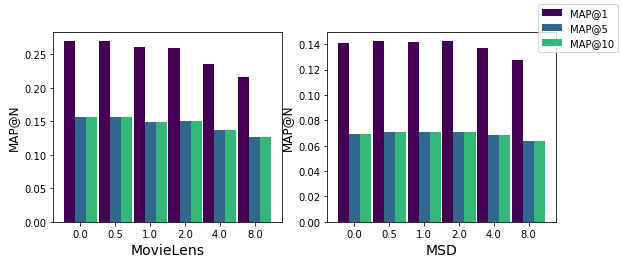

In [168]:
width = 0.95
bar_c = get_colors(range(3))
fig = plt.figure(figsize=(9,3.5))
def plot_map(ax, data):
    ax.bar(data.index - width/3, data['map@1'], width/3, label='MAP@1', color=bar_c[0])
    ax.bar(data.index, data['map@5'], width/3, label='MAP@5', color=bar_c[1])
    ax.bar(data.index + width/3, data['map@5'], width/3, label='MAP@10', color=bar_c[2])
    ax.set_xticks(data.index)
    ax.set_xticklabels(data.diversity_weight)
#     ax.set_ylim(data['map@5'.min())
    
    ax.set_ylabel('MAP@N', fontsize=12)
    
ax1 = fig.add_subplot(121)
ax1.set_xlabel('MovieLens', fontsize=14)
plot_map(ax1, pd.DataFrame(evals))
ax2 = fig.add_subplot(122)
ax2.set_xlabel('MSD', fontsize=14)
plot_map(ax2, results_diversity)
fig.legend(['MAP@1','MAP@5', 'MAP@10'])
fig.savefig('../plots/CAR_diversity_map.pdf')

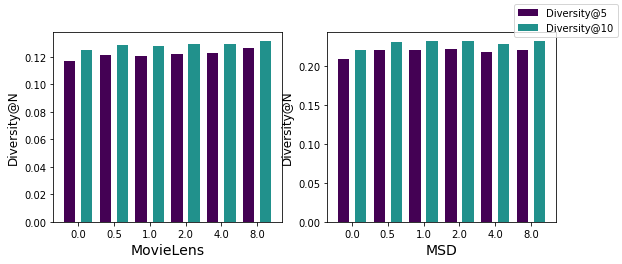

In [171]:
width = 0.95
bar_c = get_colors(range(2))
fig = plt.figure(figsize=(9,3.5))
def plot_map(ax, data):
    ax.bar(data.index - width/4, data['diversity@5'], width/3, label='Diversity@5', color=bar_c[0])
#     ax.bar(data.index, data['map@5'], width/3, label='MAP@5', color=bar_c[1])
    ax.bar(data.index + width/4, data['diversity@10'], width/3, label='Diversity@10', color=bar_c[1])
    ax.set_xticks(data.index)
    ax.set_xticklabels(data.diversity_weight)
    ax.set_ylabel('Diversity@N', fontsize=12)
#     ax.legend(loc='center right')
    
ax1 = fig.add_subplot(121)
ax1.set_xlabel('MovieLens', fontsize=14)
plot_map(ax1, pd.DataFrame(evals))
ax2 = fig.add_subplot(122)
ax2.set_xlabel('MSD', fontsize=14)
plot_map(ax2, results_diversity)
fig.legend(['Diversity@5', 'Diversity@10'])
fig.savefig('../plots/CAR_diversity_diversity.pdf')

# Experiments with novelty weight

In [ ]:
novelty_evals_2 = {'ML': list(), 'MSD': list()}
novelty_weights = [1.0, 2.0, 4.0]
for ds in [ 'MSD']:
    dataset = utils.common.movie_lens if ds == 'ML' else utils.common.msd
    for nov_weight in novelty_weights:
        nov_model = models.ConstraintAutoRec.ConstraintAutoRec(dataset['dimensions'], epochs=5, novelty_weight=nov_weight, diversity_weight=0.0, name='ConstraintAutoRec_' + ds + '_nov_' + str(nov_weight))
        nov_model.load('../saved_models/ConstraintAutoRec_' + ds + '_pretrain.h5')
        nov_model.train(utils.common.load_dataset(dataset, 'train'), dataset['train']['records'])
        nov_model.save('../saved_models')
        if ds == 'ML':
            novelty_evals_2['ML'].append(eval_ml.evaluate_single_thread(nov_model))
        else:
            novelty_evals_2['MSD'].append(eval_msd.evaluate_single_thread(nov_model))

Epoch 1/5
3686/3686 [==============================] - 62s 17ms/step - loss: 0.1306 - accuracy: 0.0297
Epoch 2/5
3686/3686 [==============================] - 49s 13ms/step - loss: 0.1274 - accuracy: 0.0281
Epoch 3/5
3686/3686 [==============================] - 49s 13ms/step - loss: 0.1255 - accuracy: 0.0289
Epoch 4/5
3686/3686 [==============================] - 48s 13ms/step - loss: 0.1243 - accuracy: 0.0282
Epoch 5/5
3686/3686 [==============================] - 49s 13ms/step - loss: 0.1234 - accuracy: 0.0297
Epoch 1/5186 predicted
3686/3686 [==============================] - 61s 16ms/step - loss: 0.1477 - accuracy: 0.0313
Epoch 2/5
3686/3686 [==============================] - 49s 13ms/step - loss: 0.1425 - accuracy: 0.0313
Epoch 3/5
3686/3686 [==============================] - 48s 13ms/step - loss: 0.1406 - accuracy: 0.0324
Epoch 4/5
3686/3686 [==============================] - 48s 13ms/step - loss: 0.1395 - accuracy: 0.0320
Epoch 5/5
3686/3686 [==============================] - 48s 1

In [140]:
novelty_evals_ml = pd.DataFrame([pre_trained_values] + novelty_evals['ML'])

In [141]:
print(novelty_evals_ml[['novelty_weight',
       'map@1', 'map@5', 'map@10', ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{rrrr}
\toprule
 novelty\_weight &  map@1 &  map@5 &  map@10 \\
\midrule
          0.000 &  0.270 &  0.156 &   0.128 \\
          0.250 &  0.291 &  0.170 &   0.141 \\
          0.500 &  0.302 &  0.177 &   0.148 \\
          1.000 &  0.309 &  0.184 &   0.155 \\
          2.000 &  0.317 &  0.188 &   0.157 \\
          4.000 &  0.319 &  0.191 &   0.159 \\
\bottomrule
\end{tabular}



In [143]:
print(novelty_evals_ml[['novelty_weight',
       'epc@5', 'epc@10', 'epd@5', 'coverage@1','coverage@5', 'coverage@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{rrrrrrr}
\toprule
 novelty\_weight &  epc@5 &  epc@10 &  epd@5 &  coverage@1 &  coverage@5 &  coverage@10 \\
\midrule
          0.000 &  0.757 &   0.775 &  0.149 &       0.087 &       0.188 &        0.259 \\
          0.250 &  0.741 &   0.758 &  0.149 &       0.051 &       0.105 &        0.148 \\
          0.500 &  0.750 &   0.766 &  0.149 &       0.052 &       0.104 &        0.145 \\
          1.000 &  0.762 &   0.777 &  0.149 &       0.048 &       0.097 &        0.136 \\
          2.000 &  0.759 &   0.774 &  0.150 &       0.042 &       0.087 &        0.120 \\
          4.000 &  0.758 &   0.773 &  0.151 &       0.041 &       0.087 &        0.125 \\
\bottomrule
\end{tabular}



In [142]:
novelty_evals_msd = pd.DataFrame([pre_trained_values_msd] + novelty_evals['MSD'])
novelty_evals_msd

,accuracy,accuracy_weight,batch_size,coverage@1,coverage@10,coverage@5,dimensions,diversity@10,diversity@5,diversity_weight,...,epochs,latent_dims,map@1,map@10,map@5,name,novelty_weight,optimizer,precision@5,recall@5
0,0.779712,1.0,32,0.330602,0.748212,0.612932,6712,0.220320,0.208579,0.0,...,5,32,0.140694,0.053800,0.068849,ConstraintAutoRec_MSD_pretrain,0.00,adam,0.107326,0.055119
1,0.835557,1.0,32,0.168206,0.497169,0.363081,6712,0.222469,0.210983,0.0,...,5,32,0.156214,0.059934,0.076787,ConstraintAutoRec_MSD_nov_0.25,0.25,adam,0.117060,0.059646
2,0.840840,1.0,32,0.145858,0.441299,0.317640,6712,0.217560,0.206865,0.0,...,5,32,0.161866,0.061778,0.079336,ConstraintAutoRec_MSD_nov_0.5,0.50,adam,0.120628,0.061601
3,0.867797,1.0,32,0.141091,0.424017,0.306466,6712,0.215251,0.204730,0.0,...,5,32,0.171988,0.065501,0.084627,ConstraintAutoRec_MSD_nov_1.0,1.00,adam,0.126928,0.065092
4,0.866943,1.0,32,0.127682,0.390346,0.283224,6712,0.212000,0.202940,0.0,...,5,32,0.183670,0.069528,0.089739,ConstraintAutoRec_MSD_nov_2.0,2.00,adam,0.132673,0.068257
5,0.855195,1.0,32,0.114720,0.353248,0.258343,6712,0.203454,0.193733,0.0,...,5,32,0.191641,0.072635,0.094605,ConstraintAutoRec_MSD_nov_4.0,4.00,adam,0.138661,0.071306


In [144]:
print(novelty_evals_msd[['novelty_weight',
       'map@1', 'map@5', 'map@10', ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{rrrr}
\toprule
 novelty\_weight &  map@1 &  map@5 &  map@10 \\
\midrule
          0.000 &  0.141 &  0.069 &   0.054 \\
          0.250 &  0.156 &  0.077 &   0.060 \\
          0.500 &  0.162 &  0.079 &   0.062 \\
          1.000 &  0.172 &  0.085 &   0.066 \\
          2.000 &  0.184 &  0.090 &   0.070 \\
          4.000 &  0.192 &  0.095 &   0.073 \\
\bottomrule
\end{tabular}



In [145]:
print(novelty_evals_msd[['novelty_weight',
       'epc@5', 'epc@10', 'epd@5', 'coverage@1','coverage@5', 'coverage@10' ]].to_latex(float_format = "%.3f", index=False))

\begin{tabular}{rrrrrrr}
\toprule
 novelty\_weight &  epc@5 &  epc@10 &  epd@5 &  coverage@1 &  coverage@5 &  coverage@10 \\
\midrule
          0.000 &  0.946 &   0.949 &  0.274 &       0.331 &       0.613 &        0.748 \\
          0.250 &  0.925 &   0.930 &  0.270 &       0.168 &       0.363 &        0.497 \\
          0.500 &  0.922 &   0.929 &  0.269 &       0.146 &       0.318 &        0.441 \\
          1.000 &  0.927 &   0.934 &  0.269 &       0.141 &       0.306 &        0.424 \\
          2.000 &  0.926 &   0.933 &  0.268 &       0.128 &       0.283 &        0.390 \\
          4.000 &  0.927 &   0.934 &  0.268 &       0.115 &       0.258 &        0.353 \\
\bottomrule
\end{tabular}



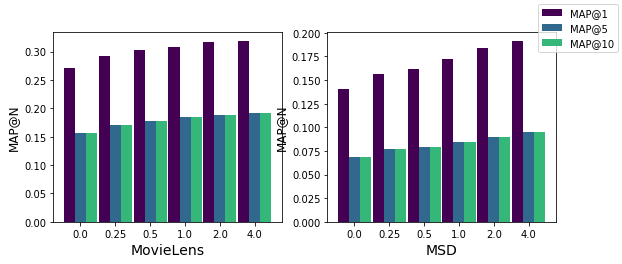

In [176]:
width = 0.95
bar_c = get_colors(range(3))
fig = plt.figure(figsize=(9,3.5))
def plot_map(ax, data):
    ax.bar(data.index - width/3, data['map@1'], width/3, label='MAP@1', color=bar_c[0])
    ax.bar(data.index, data['map@5'], width/3, label='MAP@5', color=bar_c[1])
    ax.bar(data.index + width/3, data['map@5'], width/3, label='MAP@10', color=bar_c[2])
    ax.set_xticks(data.index)
    ax.set_xticklabels(data.novelty_weight)
#     ax.set_ylim(data['map@5'.min())
    
    ax.set_ylabel('MAP@N', fontsize=12)
    
ax1 = fig.add_subplot(121)
ax1.set_xlabel('MovieLens', fontsize=14)
plot_map(ax1, novelty_evals_ml)
ax2 = fig.add_subplot(122)
ax2.set_xlabel('MSD', fontsize=14)
plot_map(ax2, novelty_evals_msd)
fig.legend(['MAP@1','MAP@5', 'MAP@10'])
fig.savefig('../plots/CAR_novelty_map.pdf')

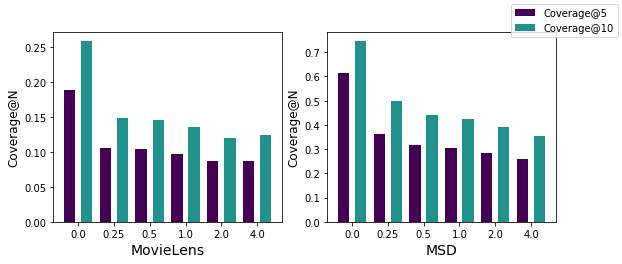

In [177]:
width = 0.95
bar_c = get_colors(range(2))
fig = plt.figure(figsize=(9,3.5))
def plot_map(ax, data):
    ax.bar(data.index - width/4, data['coverage@5'], width/3, label='Coverage@5', color=bar_c[0])
#     ax.bar(data.index, data['map@5'], width/3, label='MAP@5', color=bar_c[1])
    ax.bar(data.index + width/4, data['coverage@10'], width/3, label='Coverage@10', color=bar_c[1])
    ax.set_xticks(data.index)
    ax.set_xticklabels(data.novelty_weight)
    ax.set_ylabel('Coverage@N', fontsize=12)
#     ax.legend(loc='center right')
    
ax1 = fig.add_subplot(121)
ax1.set_xlabel('MovieLens', fontsize=14)
plot_map(ax1, novelty_evals_ml)
ax2 = fig.add_subplot(122)
ax2.set_xlabel('MSD', fontsize=14)
plot_map(ax2, novelty_evals_msd)
fig.legend(['Coverage@5', 'Coverage@10'])
fig.savefig('../plots/CAR_novelty_coverage.pdf')